In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import pickle
from tqdm.auto import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/fcarli/CellHit')

In [2]:
#import metadata from CellHit
metadata = pd.read_csv('/home/fcarli/CellHit/data/metadata/GDSC_drugs.csv')
id_to_name = dict(zip(metadata['DRUG_ID'], metadata['DRUG_NAME']))

In [5]:
id_to_name

{1003: 'Camptothecin',
 1004: 'Vinblastine',
 1005: 'Cisplatin',
 1006: 'Cytarabine',
 1007: 'Docetaxel',
 1008: 'Methotrexate',
 1009: 'Tretinoin',
 1010: 'Gefitinib',
 1011: 'Navitoclax',
 1012: 'Vorinostat',
 1013: 'Nilotinib',
 1014: 'Refametinib',
 1016: 'Temsirolimus',
 1017: 'Olaparib',
 1018: 'Veliparib',
 1019: 'Bosutinib',
 1020: 'Lenalidomide',
 1021: 'Axitinib',
 1022: 'AZD7762',
 1023: 'GW441756',
 1024: 'Lestaurtinib',
 1025: 'SB216763',
 1026: 'Tanespimycin',
 1029: 'Motesanib',
 1030: 'KU-55933',
 1031: 'Elesclomol',
 1032: 'Afatinib',
 1033: 'Vismodegib',
 1034: 'Staurosporine',
 1036: 'PLX-4720',
 1037: 'BX795',
 1038: 'NU7441',
 1039: 'SL0101',
 1042: 'Doramapimod',
 1043: 'JNK Inhibitor VIII',
 1046: 'Wee1 Inhibitor',
 1047: 'Nutlin-3a (-)',
 1048: 'Mirin',
 1049: 'PD173074',
 1050: 'ZM447439',
 1051: 'Alisertib',
 1052: 'RO-3306',
 1053: 'MK-2206',
 1054: 'Palbociclib',
 1057: 'Dactolisib',
 1058: 'Pictilisib',
 1059: 'AZD8055',
 1060: 'PD0325901',
 1061: 'SB590885

# Old models

In [6]:
old_models_path = Path('/home/fcarli/CellHit/results/gdsc/search_and_inference/moa_primed/models')

In [7]:
old_corrs = []
old_drug_ids = []

for file in tqdm(old_models_path.glob('*.pkl')):
    with open(file, 'rb') as f:
        model_container = pickle.load(f)
        old_corrs.append(np.median(model_container['drug_results']['Corr'].values))
        old_drug_ids.append(model_container['drugID'])

old_drug_names = [id_to_name[int(drug_id)] for drug_id in old_drug_ids]


0it [00:00, ?it/s]

In [8]:
np.median(old_corrs)

0.4996331811869718

In [9]:
old_df = pd.DataFrame({'drugID': old_drug_ids, 'DrugName': old_drug_names, 'Corr': old_corrs})
old_df.sort_values(by='Corr', ascending=False)

,drugID,DrugName,Corr
32,1909,Venetoclax,0.756364
277,1720,AZD5991,0.741093
154,1047,Nutlin-3a (-),0.724886
152,1029,Motesanib,0.683698
65,1060,PD0325901,0.665161
...,...,...,...
27,1594,OSI-027,0.197802
40,1059,AZD8055,0.188462
262,1926,GNE-317,0.180551
254,2169,AZD6482,0.174912


## New models

In [10]:
new_models_path = Path('/home/fcarli/WebCellHit/results/CellHit/models/gdsc')

In [11]:
new_corrs = []
new_drug_ids = []

for file in tqdm(new_models_path.glob('*.pkl')):
    with open(file, 'rb') as f:
        model_container = pickle.load(f)
        new_corrs.append(np.median(model_container['Corrs']))
        new_drug_ids.append(model_container['drugID'])

new_drug_names = [id_to_name[int(drug_id)] for drug_id in new_drug_ids]


0it [00:00, ?it/s]

In [12]:
np.median(new_corrs)

0.5294031344980701

In [13]:
new_df = pd.DataFrame({'DrugName': new_drug_names, 'drugID': new_drug_ids, 'Corr': new_corrs})
new_df.sort_values(by='Corr', ascending=False)


,DrugName,drugID,Corr
277,AZD5991,1720,0.789262
154,Nutlin-3a (-),1047,0.749560
32,Venetoclax,1909,0.742766
35,Lenalidomide,1020,0.705923
29,GSK2830371,2359,0.686347
...,...,...,...
107,OF-1,1853,0.279088
262,GNE-317,1926,0.265225
27,OSI-027,1594,0.264725
26,AZD8186,1918,0.157118


## Comparison

In [14]:
overall_df = pd.merge(old_df, new_df, on='DrugName', suffixes=('_old', '_new'))

In [17]:
overall_df.to_csv('/home/fcarli/WebCellHit/analysis/local_data/models_comparison.csv', index=False)

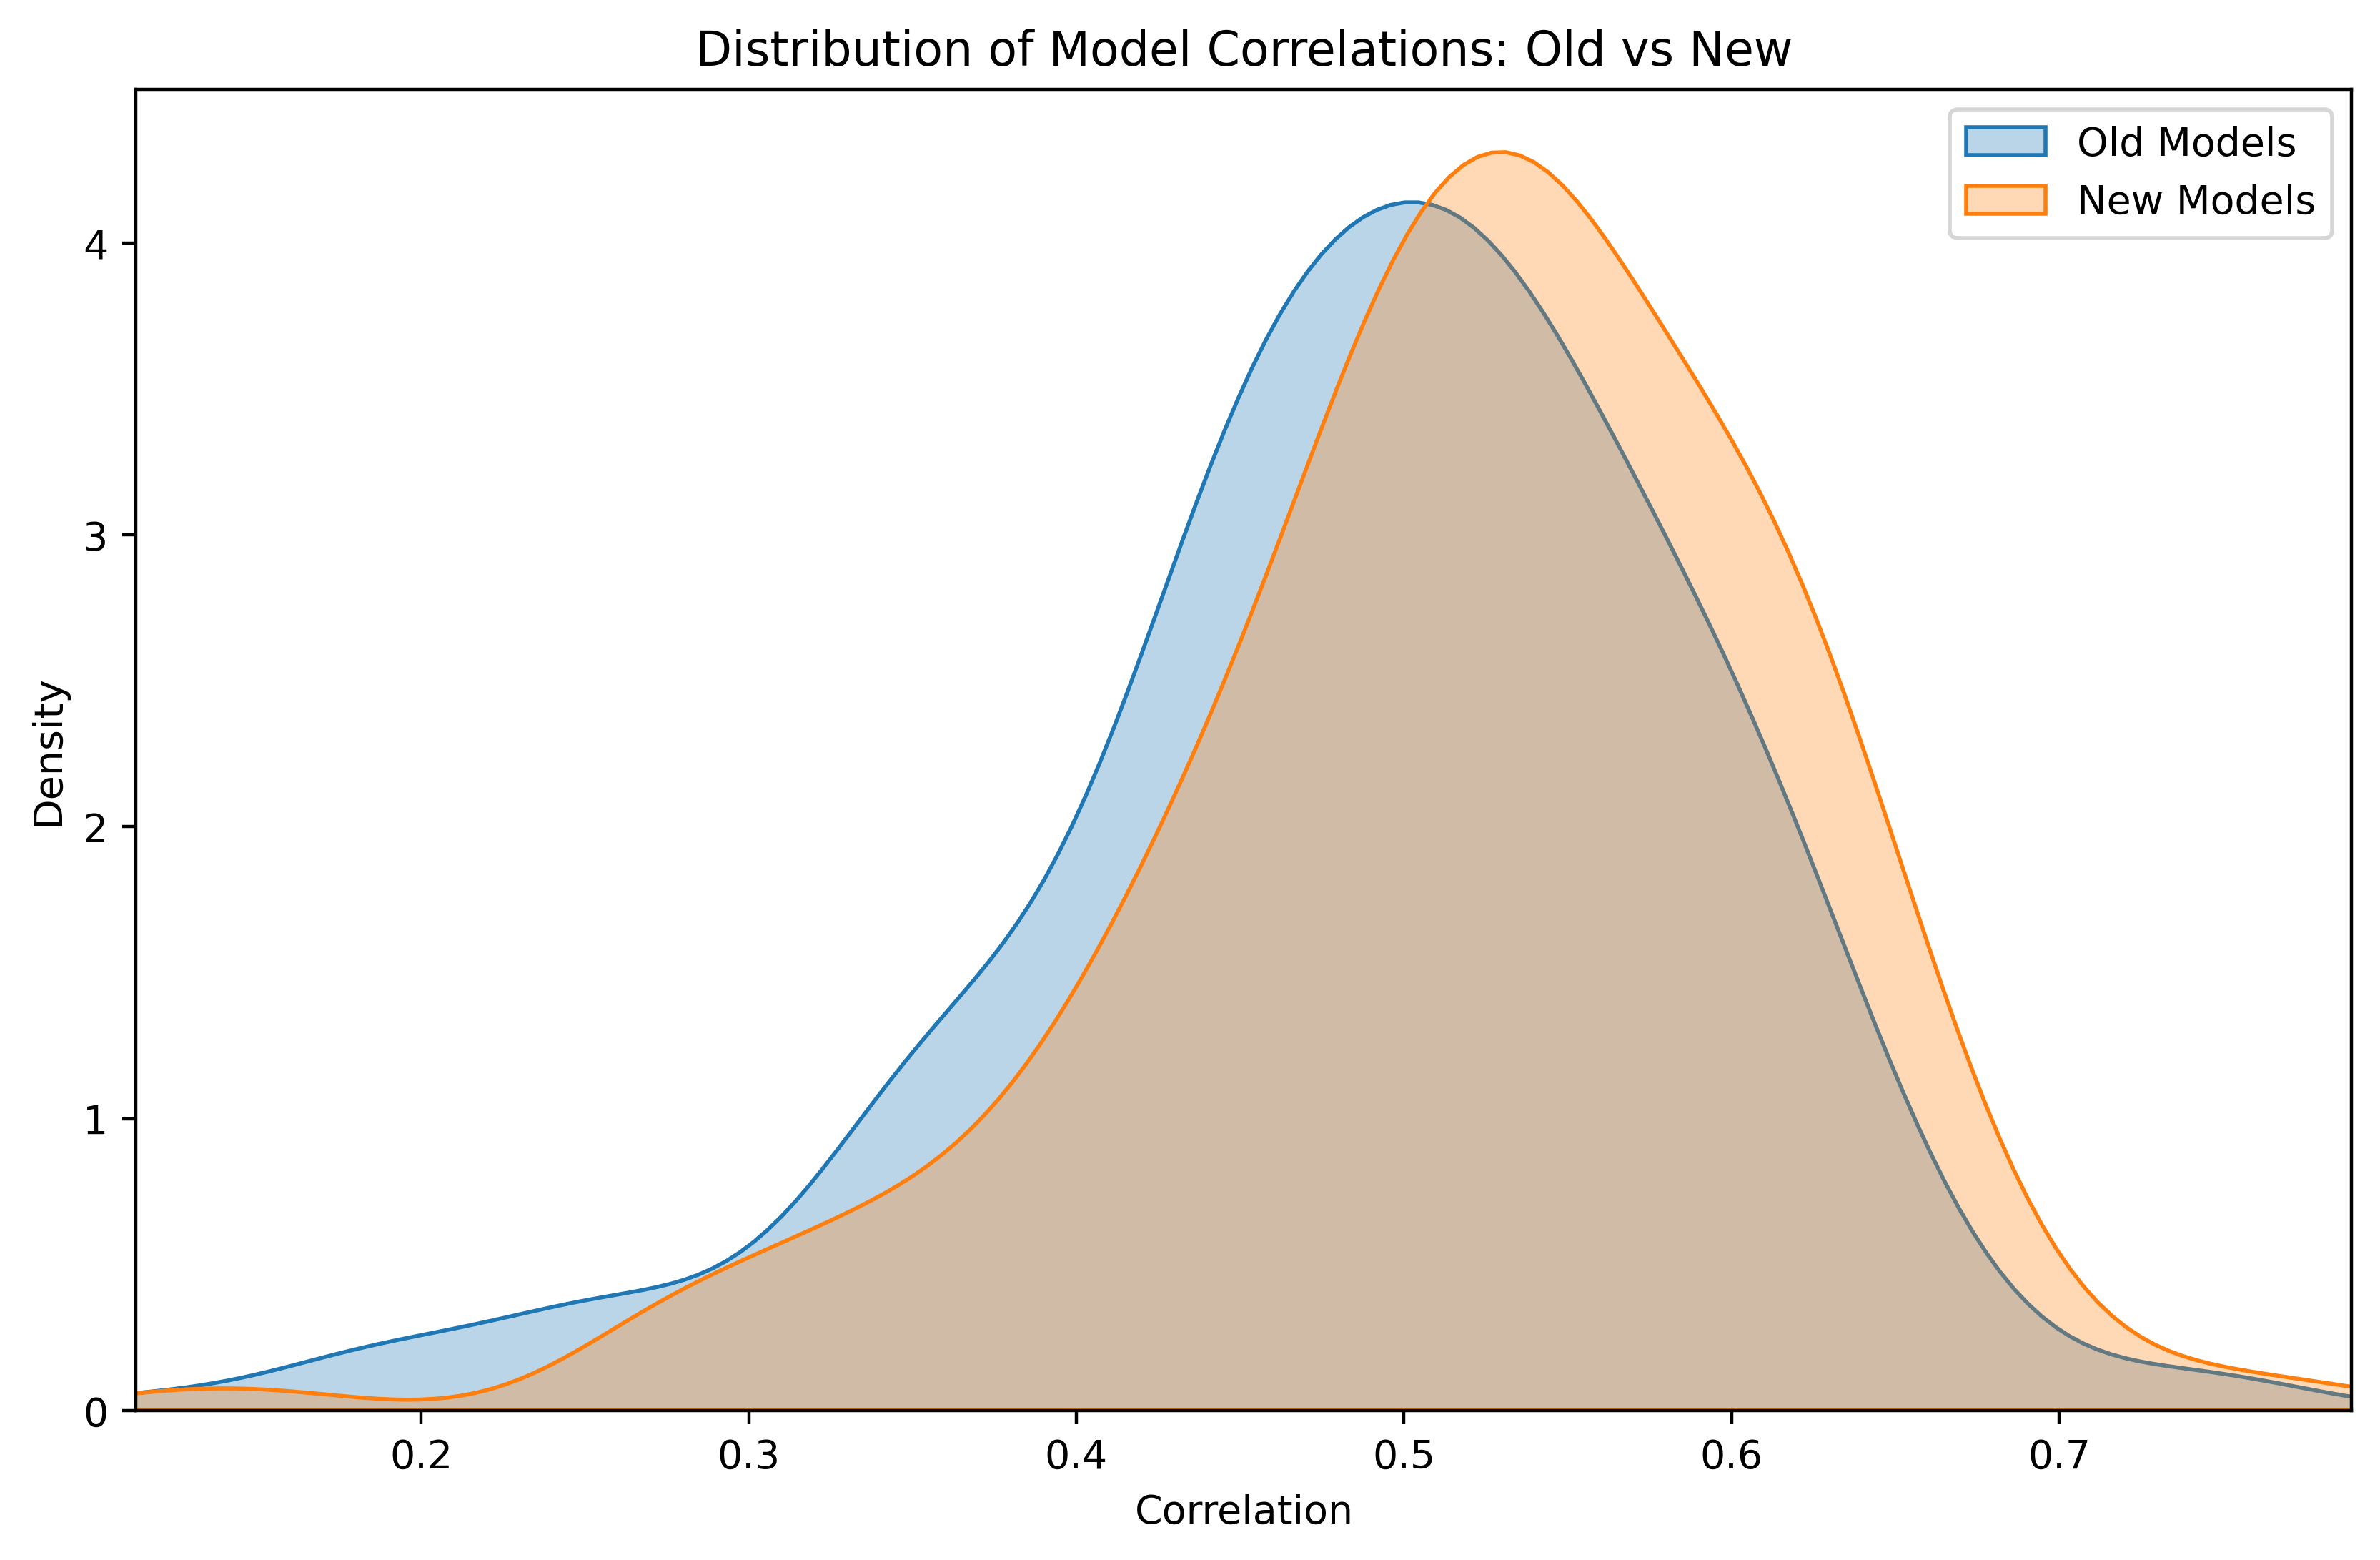

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the min and max across both distributions to set common x-axis limits
min_corr = min(overall_df['Corr_old'].min(), overall_df['Corr_new'].min())
max_corr = max(overall_df['Corr_old'].max(), overall_df['Corr_new'].max())

fig, ax = plt.subplots(figsize=(10, 6), dpi=400)
sns.kdeplot(data=overall_df, x='Corr_old', label='Old Models', fill=True, alpha=0.3, ax=ax)
sns.kdeplot(data=overall_df, x='Corr_new', label='New Models', fill=True, alpha=0.3, ax=ax)
ax.set_xlim(min_corr, max_corr)  # Set same x-axis limits for both distributions
ax.set_xlabel('Correlation')
ax.set_ylabel('Density')
ax.set_title('Distribution of Model Correlations: Old vs New')
ax.legend()
plt.show()



In [21]:
overall_df[overall_df['Corr_new'] > 0.7]

,drugID_old,DrugName,Corr_old,drugID_new,Corr_new
32,1909,Venetoclax,0.756364,1909,0.742766
35,1020,Lenalidomide,0.649895,1020,0.705923
154,1047,Nutlin-3a (-),0.724886,1047,0.749560
277,1720,AZD5991,0.741093,1720,0.789262
